In [9]:
from data.dataset import MyDataset

dataset = MyDataset(
    data_dir="ml-100k",
    ratings_path="u.data",
    ratings_sep="\t",
    items_path="",
    items_sep="",
)
print("Succesfully read data!")
dataset.trainTestValidationSplit()
print("Performed data split!")



Succesfully read data!
Performed data split!


In [23]:
from recommender.model.RBM import RBM
from pprint import pprint
bs = 20

rbm = RBM(
    n_visible=dataset.nItems,
    ratings=10,
    verbose=True,
    #device="cuda",
    n_hidden=100,
    batch_size=bs,
    learning_rate=1e-3,
    early_stopping=True,
    max_epoch=1000,
    patience=5,
)

rbm.save_model_to_file("untrainedRBM.pt")


In [24]:
rbm.fit(dataset)
rbm.fit(dataset, t=3)
rbm.fit(dataset, t=5)
rbm.fit(dataset, t=7)
rbm.fit(dataset, t=9)

#####	--------------------	TRAIN				VALIDATION
Epoch	--------------------	RMSE		MAE		RMSE		MAE
0	###################	3.655315	2.955651	3.657698	2.902117	
1	###################	3.259455	2.527066	2.876153	2.144020	
2	###################	2.920792	2.202524	2.691708	1.983974	
3	###################	2.871916	2.155812	2.630452	1.931530	
4	###################	2.878857	2.153959	2.532970	1.842420	
5	###################	2.917533	2.185148	2.590266	1.917867	
6	###################	2.830492	2.114437	2.498018	1.825434	
7	###################	2.817601	2.107755	2.474593	1.819203	
8	###################	2.783551	2.068208	2.513986	1.853056	
9	###################	2.811957	2.099748	2.520026	1.851644	
10	###################	2.812689	2.097896	2.549115	1.883026	
11	###################	2.785110	2.075802	2.521663	1.853702	
12	###################	2.776147	2.061331	2.470104	1.811890	
13	###################	2.795754	2.080155	2.441364	1.772703	
14	###################	2.802454	2.082613	2.475759	1.813909	
15	############

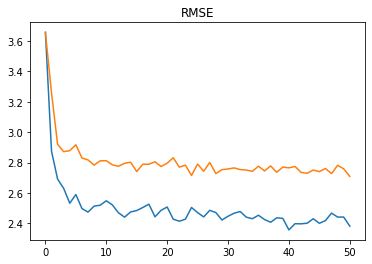

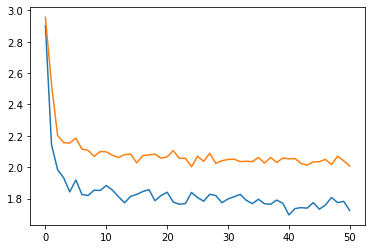

In [25]:
import matplotlib.pyplot as plt

plt.title("RMSE")

plt.plot(rbm.metrics.validRMSE)
plt.plot(rbm.metrics.trainRMSE)
plt.show()
plt.plot(rbm.metrics.validMAE)
plt.plot(rbm.metrics.trainMAE)
plt.show()

In [26]:
rbm.metrics.bestRMSE

{'epoch': 40, 'value': 2.3574107358325147}

In [27]:
rbm.metrics.bestMAE

{'epoch': 40, 'value': 1.6954828330722662}